<a href="https://colab.research.google.com/github/DavidToth1/PRA3024/blob/main/PRA3024_Assignment_1_Submission_David_Toth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing uproot
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.7 MB/s eta 0:00:00


In [2]:
#Importing uproot, numpy and matplotlib
import uproot
from numpy import *
import matplotlib.pyplot as plt


#Opening the data file
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetUp.root: DecayTree")
f.keys()


['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [3]:
#Looking at the data types
f.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

In [4]:
#f["H1_PX"].array()
     

Text(0.5, 0, 'Momentum (Kgm/s)')

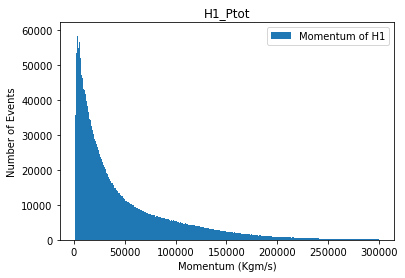

In [5]:
#Assigning the x,y,z components of the daughter particle into separate variables  
Px_H1 = f["H1_PX"].array(library="np")
Py_H1 =f["H1_PY"].array(library="np")
Pz_H1 = f["H1_PZ"].array(library="np")

#Calculating the total momentum of the daughter particle
Ptot_H1 = sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)

#Plotting the total momentum of the daughter particle
plt.hist(Ptot_H1, 500, (1000,300000), label="Momentum of H1")
plt.legend(loc="upper right")
plt.title("H1_Ptot")
plt.ylabel("Number of Events")
plt.xlabel("Momentum (Kgm/s)")


Text(0.5, 0, 'Momentum (Kgm/s)')

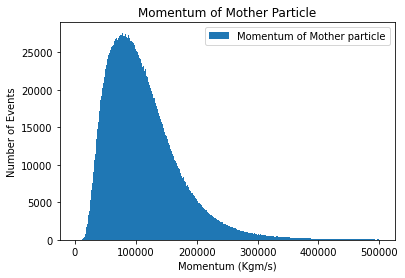

In [6]:
#Plotting the total mother momentum

#Retrieving the x,y,z momentum values for the H2 particle
Px_H2 = f["H2_PX"].array(library="np")
Py_H2 = f["H2_PY"].array(library="np")
Pz_H2 = f["H2_PZ"].array(library="np")

#Retrieving the x,y,z values for the H3 particle
Px_H3 = f["H3_PX"].array(library="np")
Py_H3 = f["H3_PY"].array(library="np")
Pz_H3 = f["H3_PZ"].array(library="np")

#Calculating the total momentum of the mother particle
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)

#Plotting the mother particle momentum
plt.hist(M_Ptot, 500, (0, 500000), label="Momentum of Mother particle")
plt.legend(loc="upper right")
plt.title("Momentum of Mother Particle")
plt.ylabel("Number of Events")
plt.xlabel("Momentum (Kgm/s)")




Text(0.5, 0, 'Mass (Mev/c^2)')

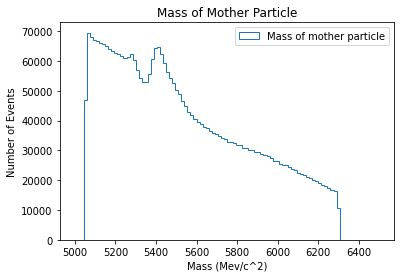

In [7]:
#Plotting the range of masses of the B meson

#Mass of a kaon particle in MeV/c^2 
mass_K = 493.677

#Calculating the total energy of each daughter particle using E^2 = M^2 + P^2
E_H1TOT = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT = sqrt(mass_K**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Calculating the total energy of the mother particle
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT

#Assigning the total momentum into a variable
P_TOT = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Calculating the mass of the mother particle using M^2 = E^2 - P^2
mass_mother = sqrt(E_TOT**2 - P_TOT**2)

#Plotiing the mass of the mother particle
plt.hist(mass_mother,100, range = [5000,6500], histtype = u'step', label="Mass of mother particle")
plt.legend(loc="upper right")
plt.title("Mass of Mother Particle")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")



Text(0.5, 0, 'Probability')

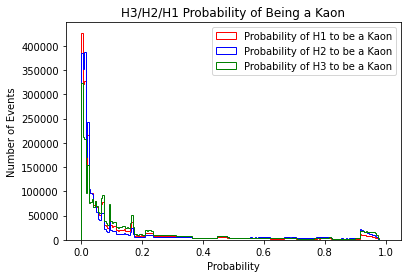

In [23]:
#Now I will create plots of the kaon probabilty for each H1/H2/h3

#Retrieving the Kaon probability for the H1 particle
H1_KaonProb = f["H1_ProbK"].array(library="np")

#Plotting the H1 probability
plt.hist(H1_KaonProb, 200, range = [0,1], ec = "red", histtype = u'step', label="Probability of H1 to be a Kaon")


#Retrieving the Kaon probability for the H2 particle
H2_KaonProb = f["H2_ProbK"].array(library="np")

#Plotting the H2 probability
plt.hist(H2_KaonProb, 200, range = [0,1], ec = "blue", histtype = u'step', label="Probability of H2 to be a Kaon")


#Retrieving the Kaon probability for the H3 particle
H3_KaonProb = f["H3_ProbK"].array(library="np")

#Plotting the H3 probability
plt.hist(H3_KaonProb, 200, range = [0,1], ec = "green", histtype = u'step', label="Probability of H3 to be a Kaon")

#Adding titles to the plot
plt.title("H3/H2/H1 Probability of Being a Kaon")
plt.legend(loc="upper right")
plt.ylabel("Number of Events")
plt.xlabel("Probability")

Text(0.5, 0, 'Probability')

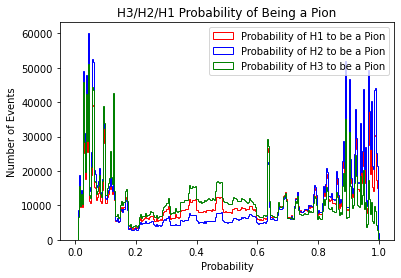

In [32]:
#Next I will plot the probabilities of H1/H2/H3 of being a Pion

#Retrieving the Pion probability for the H1 particle
H1_PionProb = f["H1_ProbPi"].array(library="np")

#Plotting the H1 probability
plt.hist(H1_PionProb, 300, range = [0,1], ec = 'red', histtype = u'step', label="Probability of H1 to be a Pion")


#Retrieving the Pion probability for the H2 particle
H2_PionProb = f["H2_ProbPi"].array(library="np")

#Plotting the H2 probability
plt.hist(H2_PionProb, 300, range = [0,1], ec = 'blue', histtype = u'step', label="Probability of H2 to be a Pion")


#Retrieving the Pion probability for the H3 particle
H3_PionProb = f["H3_ProbPi"].array(library="np")

#Plotting the H3 probability
plt.hist(H3_PionProb, 300, range = [0,1], ec = 'green', histtype = u'step', label="Probability of H3 to be a Pion")

#Adding titles to the plot
plt.title("H3/H2/H1 Probability of Being a Pion")
plt.legend(loc="upper right")
plt.ylabel("Number of Events")
plt.xlabel("Probability")

Text(0, 0.5, 'Number of Events')

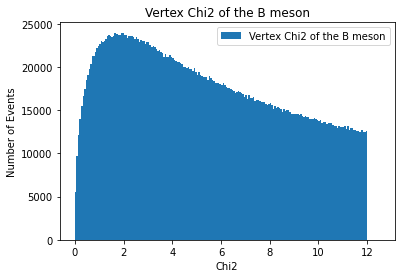

In [33]:
#Plotting the B_VertexChi2 variable of all particles

#Retrieving the B_VertexChi2 data
BVChi2 = f["B_VertexChi2"].array(library="np")

#Plotting the Vertex Chi2 of the B particle
plt.hist(BVChi2, 200, range = [0, 12.5], label="Vertex Chi2 of the B meson")

#Adding titles to the plot
plt.title("Vertex Chi2 of the B meson")
plt.legend(loc="upper right")
plt.xlabel("Chi2")
plt.ylabel("Number of Events")


Text(0.5, 0, 'Mass (Mev/c^2)')

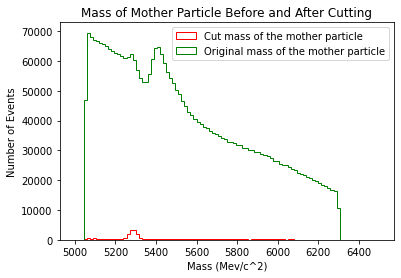

In [11]:


#Cutting the pre-existing data and storing it
Tree_Cut = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.3)&(H1_ProbPi>0.01)&(H2_isMuon==0)&(H2_ProbK>0.3)&(H2_ProbPi>0.01)&(H3_isMuon==0)&(H3_ProbK>0.3)&(H3_ProbPi>0.01)", library="np")

#Now I will calculate the mass of the mother particle using the new cut data
E_H1TOT_Cut = sqrt(mass_K**2 + sqrt(Tree_Cut["H1_PX"]**2 + Tree_Cut["H1_PY"]**2 + Tree_Cut["H1_PZ"]**2)**2)
E_H2TOT_Cut = sqrt(mass_K**2 + sqrt(Tree_Cut["H2_PX"]**2 + Tree_Cut["H2_PY"]**2 + Tree_Cut["H2_PZ"]**2)**2)
E_H3TOT_Cut = sqrt(mass_K**2 + sqrt(Tree_Cut["H3_PX"]**2 + Tree_Cut["H3_PY"]**2 + Tree_Cut["H3_PZ"]**2)**2)

#Calculating the total energy of the mother particle
E_TOT_Cut = E_H1TOT_Cut + E_H2TOT_Cut + E_H3TOT_Cut

#Assigning the total cut momentum into a variable
P_TOTCUT = sqrt((Tree_Cut["H1_PX"] + Tree_Cut["H2_PX"] + Tree_Cut["H3_PX"])**2 + (Tree_Cut["H1_PY"] + Tree_Cut["H2_PY"] + Tree_Cut["H3_PY"])**2 + (Tree_Cut["H1_PZ"] + Tree_Cut["H2_PZ"] + Tree_Cut["H3_PZ"])**2)

#Calculating the mass of the mother particle using M^2 = E^2 - P^2
mass_mother_Cut = sqrt(E_TOT_Cut**2 - P_TOTCUT**2)

#Plotting the cut mass of the mother particle
plt.hist(mass_mother_Cut, 100, ec = "red", histtype = u"step", range = [5000,6500], label="Cut mass of the mother particle")

#Plotting the pre-cut mass of the mother prticle
plt.hist(mass_mother, 100, ec = "green", histtype = u"step", range = [5000, 6500], label="Original mass of the mother particle")

#Adding titles
plt.title("Mass of Mother Particle Before and After Cutting")
plt.legend(loc="upper right")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

#I notice the the number of events after the cut is very small (however not zero)

In [12]:
#Installing lmfit
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 9.9 MB/s eta 0:00:00


The reported value of the Chi^2 is: 4089794.4299702933
The yields are: 284264.91897708364 +/- 5940.91546


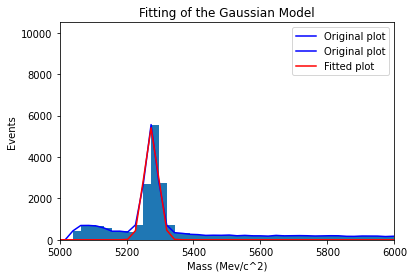

In [50]:
#Importing curve fit and the gaussian & exponential models
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ExponentialModel

#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut, 300, (0,7000))

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5350,gauss_amplitude = 5350,gauss_sigma = 5.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Printing the results
#print(model_fitg.fit_report())

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = 'b', label = "Original plot")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'r', label = "Fitted plot")
plt.legend(loc = "upper right")
plt.xlim(5000,6000)

#Adding titles
plt.title("Fitting of the Gaussian Model")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")


#Printing the value of the Chi^2
print("The reported value of the Chi^2 is: " + str(model_fitg.chisqr))
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value) + " +/- 5940.91546")





The reported value of the Chi^2 is: 47504456.37920842
 
The yields are: 26.707621339222968 +/- 23.2775944


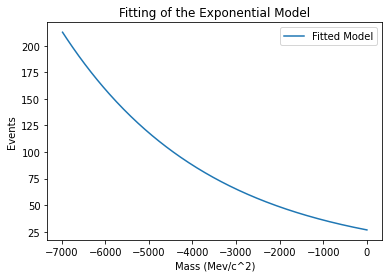

In [44]:
#Now for the exponential fitting

#Creating the Exponential model
expo_mod = ExponentialModel(independant_vars = ['events'],prefix = 'expo_', nan_policy = 'raise' )

#naming the parameters and assigning their values
params_exp = expo_mod.make_params(expo_amplitude = 23671, expo_decay = 50000)

#Fitting the data to the model using the parameters
model_fit_exp = expo_mod.fit(events, params_exp, x=mass[:-1])

#Printing the results
#print(model_fit_exp.fit_report())

#Ploting the data and the best fit
exp_fit = expo_mod.fit(events, params_exp, x = mass[:-1])
plt.plot(-mass[:-1], exp_fit.best_fit, label = 'Fitted Model')

#Adding titles
plt.title("Fitting of the Exponential Model")
plt.legend(loc="upper right")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")

#Printing the value of the Chi^2 and yields
print("The reported value of the Chi^2 is: " + str(model_fit_exp.chisqr))
print(" ")
print("The yields are: " + str(model_fit_exp.params['expo_amplitude'].value) + " +/- 23.2775944")


The reported value of the Chi^2 is: 46468080.91465089
The yields for the exponential and gaussian respectivly are: 7135.248951676478 +/- 131319.203 and -998636709.412689 +/- 7.8719e+10


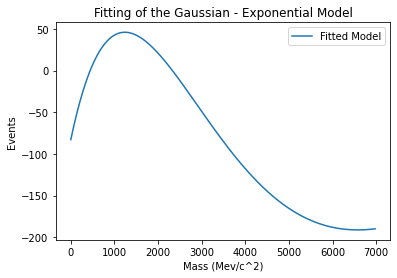

In [45]:
#Now for the exponential-gaussian fitting

#Creating the Exponential model
expo_mod = ExponentialModel(independant_vars = ['mass'],prefix = 'expo_', nan_policy = 'raise' )

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['mass'],prefix = 'gauss_')

model_GE = expo_mod + gauss_mod

#naming the parameters and assigning their values
params_GE = model_GE.make_params(expo_amplitude = 23671, expo_decay = 50000, gauss_center= 5350, gauss_amplitude = 5350, gauss_sigma = 5.0)


#Fitting the data to the model using the parameters
model_fit_GE = model_GE.fit(events, params_GE, x=mass[:-1])

#Printing the results
#print(model_fit_GE.fit_report())

#Ploting the data and the best fit
GE_fit = model_GE.fit(events, params_GE, x = mass[:-1])
plt.plot(mass[:-1], -1*GE_fit.best_fit, label = 'Fitted Model')

#Adding titles
plt.title("Fitting of the Gaussian - Exponential Model")
plt.legend(loc="upper right")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")

#Printing the value of the Chi^2
print("The reported value of the Chi^2 is: " + str(model_fit_GE.chisqr))
print("The yields for the exponential and gaussian respectivly are: " + str(model_fit_GE.params['expo_amplitude'].value) + " +/- 131319.203 and " + str(model_fit_GE.params['gauss_amplitude'].value) + " +/- 7.8719e+10")

In [16]:
#Counting

#Creating an empty array that will hold all B minus events
B_minus = []

#Creating an empty array that will hold all B plus events
B_plus = []

#Creating an empty array to see if there even is data to discard
Data_To_Discard = []

#Retrieving the charges of H1/H2/H3 and storing them in variables
H1_charge = f["H1_Charge"].array(library="np")
H2_charge = f["H2_Charge"].array(library="np")
H3_charge = f["H3_Charge"].array(library="np")

#Transposing the H1/H2/H3 charges to create a 2D array
Charge_DataArray = transpose([H1_charge, H2_charge, H3_charge])

#Setting the condition for a B+ event (2 positive 1 negative) and the condition for a B- event (2 negative 1 positive), and the results in the corresponding empty arrays
for Sum in Charge_DataArray:
  if sum(Sum) == 1:
    B_plus.append(Sum)
  elif sum(Sum) == -1:
    B_minus.append(Sum) 

#Setting the conditions for neither a B+ nor a B- and putting it in the data to discard array    
for badbaddata in Charge_DataArray:
  if sum(badbaddata) == 3 or sum(badbaddata) == -3:
    Data_To_Discard.append(badbaddata)

#As can be shown by this, there are no instances where the condition for the B+ and B- are not met
print(Data_To_Discard)
#I looked over the data and these are the only combinations of B+ and B- I could see...
print(B_plus[0])
print(B_minus[0])



[]
[-1  1  1]
[ 1 -1 -1]


Text(0.5, 0, 'Mass (Mev/c^2)')

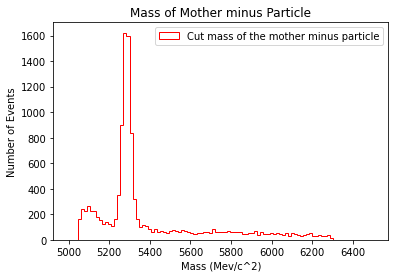

In [46]:
#So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minus = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.3)&(H1_ProbPi>0.01)&(H2_isMuon==0)&(H2_ProbK>0.3)&(H2_ProbPi>0.01)&(H3_isMuon==0)&(H3_ProbK>0.3)&(H3_ProbPi>0.01)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plus = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.3)&(H1_ProbPi>0.01)&(H2_isMuon==0)&(H2_ProbK>0.3)&(H2_ProbPi>0.01)&(H3_isMuon==0)&(H3_ProbK>0.3)&(H3_ProbPi>0.01)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus["H1_PX"]**2 + Tree_Cut_minus["H1_PY"]**2 + Tree_Cut_minus["H1_PZ"]**2)**2)
E_H2TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus["H2_PX"]**2 + Tree_Cut_minus["H2_PY"]**2 + Tree_Cut_minus["H2_PZ"]**2)**2)
E_H3TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus["H3_PX"]**2 + Tree_Cut_minus["H3_PY"]**2 + Tree_Cut_minus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minus = E_H1TOT_Cut_minus + E_H2TOT_Cut_minus + E_H3TOT_Cut_minus

#Assigning the total cut momentum into a variable
P_TOTCUT_minus = sqrt((Tree_Cut_minus["H1_PX"] + Tree_Cut_minus["H2_PX"] + Tree_Cut_minus["H3_PX"])**2 + (Tree_Cut_minus["H1_PY"] + Tree_Cut_minus["H2_PY"] + Tree_Cut_minus["H3_PY"])**2 + (Tree_Cut_minus["H1_PZ"] + Tree_Cut_minus["H2_PZ"] + Tree_Cut_minus["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minus = sqrt(E_TOT_Cut_minus**2 - P_TOTCUT_minus**2)

#Plotting the cut mass of the mother minus particle
plt.hist(mass_mother_Cut_minus, 100, ec = "red", histtype = u"step", range = [5000,6500], label="Cut mass of the mother minus particle")

#Adding titles
plt.title("Mass of Mother minus Particle")
plt.legend(loc="upper right")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")


Text(0.5, 0, 'Mass (Mev/c^2)')

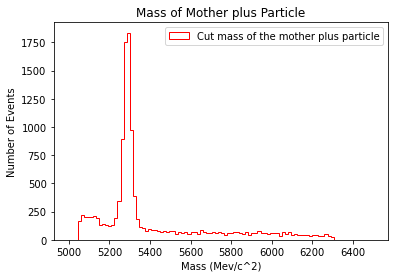

In [47]:
#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus["H1_PX"]**2 + Tree_Cut_plus["H1_PY"]**2 + Tree_Cut_plus["H1_PZ"]**2)**2)
E_H2TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus["H2_PX"]**2 + Tree_Cut_plus["H2_PY"]**2 + Tree_Cut_plus["H2_PZ"]**2)**2)
E_H3TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus["H3_PX"]**2 + Tree_Cut_plus["H3_PY"]**2 + Tree_Cut_plus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother plus particle
E_TOT_Cut_plus = E_H1TOT_Cut_plus + E_H2TOT_Cut_plus + E_H3TOT_Cut_plus

#Assigning the total cut momentum into a variable
P_TOTCUT_plus = sqrt((Tree_Cut_plus["H1_PX"] + Tree_Cut_plus["H2_PX"] + Tree_Cut_plus["H3_PX"])**2 + (Tree_Cut_plus["H1_PY"] + Tree_Cut_plus["H2_PY"] + Tree_Cut_plus["H3_PY"])**2 + (Tree_Cut_plus["H1_PZ"] + Tree_Cut_plus["H2_PZ"] + Tree_Cut_plus["H3_PZ"])**2)

#Calculating the mass of the mother plus particle using M^2 = E^2 - P^2
mass_mother_Cut_plus = sqrt(E_TOT_Cut_plus**2 - P_TOTCUT_plus**2)

#Plotting the cut mass of the mother plus particle
plt.hist(mass_mother_Cut_plus, 100, ec = "red", histtype = u"step", range = [5000,6500], label="Cut mass of the mother plus particle")

#Adding titles
plt.title("Mass of Mother plus Particle")
plt.legend(loc="upper right")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

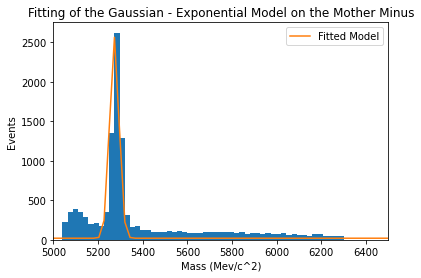

In [52]:
#Now I will fit the data of the mother minus particle using the Gaussian-Exponential method

#Assigning the events and mass data from the cut mother minus particle mass to x & y data
events_minus, mass_minus, varm = plt.hist(mass_mother_Cut_minus, 300, (0,7000))

#Creating the Exponential model
expo_mod_minus = ExponentialModel(independant_vars = ['mass_minus'],prefix = 'expo_', nan_policy = 'raise' )

#Creating the Gauss model
gauss_mod_minus = GaussianModel(independant_vars = ['mass_minus'],prefix = 'gauss_')

model_GE_minus = expo_mod_minus + gauss_mod_minus

#naming the parameters and assigning their values
params_GE_minus = model_GE_minus.make_params(expo_amplitude = 5000, expo_decay = 50000, gauss_center= 6000, gauss_amplitude = 5350, gauss_sigma = 5.0)


#Fitting the data to the model using the parameters
model_fit_GE_minus = model_GE_minus.fit(events_minus, params_GE_minus, x=mass_minus[:-1])

#Printing the results
#print(model_fit_GE_minus.fit_report())

#Ploting the data and the best fit
GE_fit_minus = model_GE_minus.fit(events_minus, params_GE_minus, x = mass_minus[:-1])
plt.plot(mass_minus[:-1], GE_fit_minus.best_fit, label = 'Fitted Model')
plt.xlim(5000,6500)

#Getting the yield of the fit
fitted_yield_minus = model_fit_GE_minus.params['gauss_amplitude'].value

#Adding titles
plt.title("Fitting of the Gaussian - Exponential Model on the Mother Minus")
plt.legend(loc="upper right")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

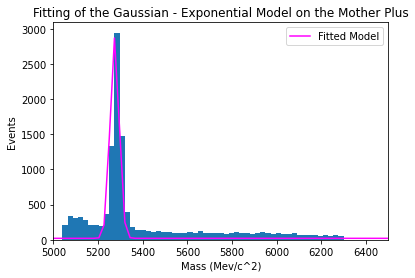

In [51]:
#Doing the same for the mother plus particle

#Assigning the events and mass data from the cut mother minus particle mass to x & y data
events_plus, mass_plus, varp = plt.hist(mass_mother_Cut_plus, 300, (0,7000))

#Creating the Exponential model
expo_mod_plus = ExponentialModel(independant_vars = ['mass_plus'],prefix = 'expo_', nan_policy = 'raise' )

#Creating the Gauss model
gauss_mod_plus = GaussianModel(independant_vars = ['mass_plus'],prefix = 'gauss_')

model_GE_plus = expo_mod_plus + gauss_mod_plus

#naming the parameters and assigning their values
params_GE_plus = model_GE_plus.make_params(expo_amplitude = 5000, expo_decay = 50000, gauss_center= 6000, gauss_amplitude = 5350, gauss_sigma = 5.0)


#Fitting the data to the model using the parameters
model_fit_GE_plus = model_GE_plus.fit(events_plus, params_GE_plus, x=mass_plus[:-1])

#Printing the results
#print(model_fit_GE_plus.fit_report())

#Ploting the data and the best fit
GE_fit_plus = model_GE_plus.fit(events_plus, params_GE_plus, x = mass_plus[:-1])
plt.plot(mass_plus[:-1], GE_fit_plus.best_fit, label = 'Fitted Model', color = 'magenta')
plt.xlim(5000,6500)

#Getting the yield of the fit
fitted_yield_plus = model_fit_GE_plus.params['gauss_amplitude'].value

#Adding titles
plt.title("Fitting of the Gaussian - Exponential Model on the Mother Plus")
plt.legend(loc="upper right")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")

In [53]:
#Now to compute the asymmetry and the uncertainty

#Calculating the asymmetry using the provided equation
Asymmetry = (fitted_yield_minus - fitted_yield_plus)/(fitted_yield_minus + fitted_yield_plus)

#Calculating the uncertainty using the provided equation
sigmaA_uncertainty = sqrt((1-Asymmetry**2)/(fitted_yield_minus + fitted_yield_plus))

#Printing the asymmetry and unceratainty

print("The value of the asymmetry is: " + str(Asymmetry))
print("The value of the uncertainty is: " + str(sigmaA_uncertainty))

The value of the asymmetry is: -0.043152567368891
The value of the uncertainty is: 0.0018903243829354469
